<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/benchmarking_inference_speed_gpu_vs_cpu_opencv_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In Notebook "configure_opencv_with_gpu_on_colab.ipynb" we have seen how to install and configure OpenCV on Colab with GPU support because OpenCV > 4.2. supports NVIDIA GPUs for inference using OpenCV’s dnn module, improving inference speed.

In this notebook, we will benchmark a deep learning model (pre-trained and ready to use using OpenCV) for both CPU and GPU inference speed. More specifically, as an example we will use a pre-trained models for human pose estimation

References:
*   [Deep Learning based Human Pose Estimation using OpenCV (C++/Python)](https://learnopencv.com/deep-learning-based-human-pose-estimation-using-opencv-cpp-python/)
*   [openpose.py](https://github.com/opencv/opencv/blob/master/samples/dnn/openpose.py)
*   [openpose.cpp](https://github.com/opencv/opencv/blob/master/samples/dnn/openpose.cpp)

# Introduction

The pre-trained model used in this notebook is based on the paper [Multi-Person Pose Estimation](https://arxiv.org/pdf/1611.08050.pdf). 

The authors of the paper have shared two models. One is trained on the [MPII Human Pose dataset](http://human-pose.mpi-inf.mpg.de/) and the other is trained on the [COCO 2018 Keypoint dataset](https://cocodataset.org/#keypoints-2018):

*  The COCO model produces 18 points
*  MPII model produces 15 points

For simplification, in this Notebook we are going to use the MPII one. MPII Output Format is as follows: 

```
Head – 0
Neck – 1
Right Shoulder – 2 
Right Elbow – 3
Right Wrist – 4
Left Shoulder – 5
Left Elbow – 6
Left Wrist – 7
Right Hip – 8
Right Knee – 9
Right Ankle – 10
Left Hip – 11
Left Knee – 12
Left Ankle – 13
Chest – 14
Background – 15
```

# Load and test the inference time with no GPU support

First step is to download models trained on Caffe Deep Learning Framework. Two files are needed:
*   .prototxt file which specifies the architecture of the neural network.
*   .caffemodel file which stores the weights of the trained model.

In the file [openpose.cpp](https://github.com/opencv/opencv/blob/master/samples/dnn/openpose.cpp) included in the OpenCV repository, you can see the links to download the afforementioned two files for both the CODO model and the MPII model.

In [ ]:
# here you can see the links: https://github.com/opencv/opencv/blob/master/samples/dnn/openpose.cpp
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/openpose_pose_mpi_faster_4_stages.prototxt
!wget http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel

--2021-02-17 14:04:48--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/openpose_pose_mpi_faster_4_stages.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32813 (32K) [text/plain]
Saving to: ‘openpose_pose_mpi_faster_4_stages.prototxt’

openpose_pose_mpi_f 100%[===================>]  32.04K  --.-KB/s    in 0s      

2021-02-17 14:04:49 (118 MB/s) - ‘openpose_pose_mpi_faster_4_stages.prototxt’ saved [32813/32813]

--2021-02-17 14:04:49--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP r

In [ ]:
# Set both proto file and weights with the names of the downloaded files:
protoFile = "openpose_pose_mpi_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"

At this point, we can read the network into memory. Note the two commented lines (OpenCV version < 4.2)

In [ ]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
# net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
# net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [ ]:
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

In [ ]:
!wget "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg" -O messi.jpg

--2021-02-17 14:05:40--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72937 (71K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  71.23K  --.-KB/s    in 0.002s  

2021-02-17 14:05:40 (40.2 MB/s) - ‘messi.jpg’ saved [72937/72937]



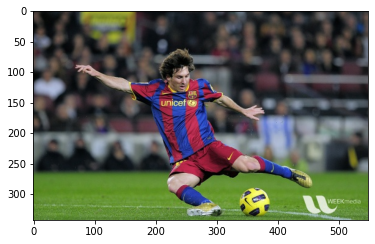

In [ ]:
from matplotlib import pyplot as plt

frame = cv2.imread('./messi.jpg')

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
import numpy as np

frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [ ]:
import time
t = time.time()
# input image dimensions for the network
inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 4.203


In [ ]:
H = output.shape[2]
W = output.shape[3]

# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

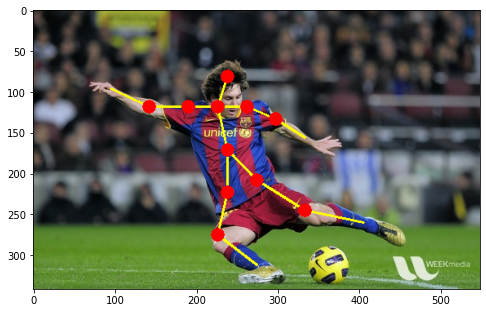

In [ ]:
plt.figure(figsize=(8,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

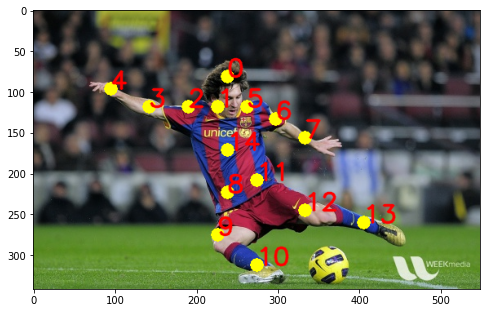

In [ ]:
plt.figure(figsize=(8,10))
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.show()

# Install and test OpenCV with GPU support

The first step is to install OpenCV (> 4.2) from source code with GPU support because OpenCV’s dnn module requires you to compile OpenCV from source code and you cannot "pip install" OpenCV with GPU support.
See [this notebook](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/configure_opencv_with_gpu_on_colab.ipynb) for more information about this.


In [ ]:
# Download and install OpenCV 4.5.1 library compiled with GPU support
# See notebook 'configure_opencv_with_gpu_on_colab.ipynb' for more info
!gdown --id 1-Ze3zkdzA_kDsakY_hGAZRh3aK3p5lHk

Downloading...
From: https://drive.google.com/uc?id=1-Ze3zkdzA_kDsakY_hGAZRh3aK3p5lHk
To: /content/cv2.cpython-36m-x86_64-linux-gnu.so
984MB [00:08, 123MB/s]


Output the version of OpenCV. As you can see, we have to restart the runtime to refresh the installed version of OpenCV

In [ ]:
print("OpenCV version: '{}'".format(cv2.__version__))

OpenCV version: '4.1.2'


So we have to restart the runtime

In [ ]:
# Restart the runtime:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)

restart_runtime()

Now, the OpenCV version is refreshed. Let's check it.

In [ ]:
import cv2
print("Just a reminder from our previous notebook 'configure_opencv_with_gpu_on_colab.ipynb'")
print("You need OpenCV 4.2 or above to use DNN_BACKEND_CUDA & DNN_TARGET_CUDA")
print("Lets check it")
print("Current OpenCV installation: '{}'".format(cv2.__version__))
try:
  print("cv2.dnn.DNN_BACKEND_CUDA: '{}'".format(cv2.dnn.DNN_BACKEND_CUDA))
  print("cv2.dnn.DNN_TARGET_CUDA: '{}'".format(cv2.dnn.DNN_TARGET_CUDA))
except AttributeError: 
  print("CUDA backend will not be used in this notebook")

Just a reminder from our previous notebook 'configure_opencv_with_gpu_on_colab.ipynb'
You need OpenCV 4.2 or above to use DNN_BACKEND_CUDA & DNN_TARGET_CUDA
Lets check it
Current OpenCV installation: '4.5.1-dev'
cv2.dnn.DNN_BACKEND_CUDA: '5'
cv2.dnn.DNN_TARGET_CUDA: '6'


Finally, let's see if there is NVIDA, CUDA or CUDNN information included in the build information using `cv2.getBuildInformation()`:

In [ ]:
import cv2
import re

cv_info = [re.sub('\s+', ' ', ci.strip()) for ci in cv2.getBuildInformation().strip().split('\n') 
               if len(ci) > 0 and re.search(r'(nvidia*:?)|(cuda*:)|(cudnn*:)', ci.lower()) is not None]
print(cv_info)

['NVIDIA CUDA: YES (ver 10.1, CUFFT CUBLAS)', 'NVIDIA GPU arch: 30 35 37 50 52 60 61 70 75', 'NVIDIA PTX archs:', 'cuDNN: YES (ver 7.6.5)']


In [ ]:
import cv2

# Set both proto file and weights with the names of the downloaded files:
protoFile = "openpose_pose_mpi_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
# net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
# net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

frame = cv2.imread('./messi.jpg')

import time
t = time.time()
# input image dimensions for the network
inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 2.556


In [ ]:
import cv2

# Set both proto file and weights with the names of the downloaded files:
protoFile = "openpose_pose_mpi_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

frame = cv2.imread('./messi.jpg')

import time
t = time.time()
# input image dimensions for the network
inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 0.130


In [ ]:
# importing the modules 
from IPython.display import display, HTML 
import pandas as pd 
  
# creating a DataFrame 
dict = {'OpenCV version' : ['OpenCV 4.1.2','4.5.1-dev','4.5.1-dev'], 
        'GPU Support' : ['NO', 'YES', 'YES'], 
        'DNN_BACKEND_CUDA and DNN_TARGET_CUDA' : ['NO', 'NO', 'YES'],
        'Inference time': ['4.203','2.556','0.130']} 
df = pd.DataFrame(dict) 

# displaying the DataFrame (without showing the row indices)
HTML(df.to_html(index=False))

OpenCV version,GPU Support,DNN_BACKEND_CUDA and DNN_TARGET_CUDA,Inference time
OpenCV 4.1.2,NO,NO,4.203
4.5.1-dev,YES,NO,2.556
4.5.1-dev,YES,YES,0.130


# Conclusions

In this notebook, and as an example, we benchmarked a deep learning model (pre-trained and ready to use using OpenCV) for both CPU and GPU inference speed. This example is used for human pose estimation

Note that in Notebook "configure_opencv_with_gpu_on_colab.ipynb" we have seen how to install and configure OpenCV on Colab with GPU support because OpenCV > 4.2. supports NVIDIA GPUs for inference using OpenCV’s dnn module, improving inference speed.
